# Varianz-Analyse

## Beispiel: Reissfestigkeit von Papier

### Paarweise t-Tests

In [1]:
from pandas import DataFrame
import scipy.stats as st
import numpy as np
import seaborn as sns

rf = DataFrame({
"HC": np.repeat(["5%", "10%", "15%", "20%"], [6, 6, 6, 6]),
"Strength":[7, 8, 15, 11, 9, 10, 12, 17, 13, 18, 19, 15, 14, 18, 19, 17, 16, 18, 19, 25, 22, 23, 18, 20]
})
print(rf)
per5 = rf.loc[rf["HC"]=="5%", "Strength"]
per10 = rf.loc[rf["HC"]=="10%", "Strength"]
per15 = rf.loc[rf["HC"]=="15%", "Strength"]
per20 = rf.loc[rf["HC"]=="20%", "Strength"]

     HC  Strength
0    5%         7
1    5%         8
2    5%        15
3    5%        11
4    5%         9
5    5%        10
6   10%        12
7   10%        17
8   10%        13
9   10%        18
10  10%        19
11  10%        15
12  15%        14
13  15%        18
14  15%        19
15  15%        17
16  15%        16
17  15%        18
18  20%        19
19  20%        25
20  20%        22
21  20%        23
22  20%        18
23  20%        20


In [2]:
st.ttest_ind(per10,per20)
print(st.ttest_ind(per10,per20))

Ttest_indResult(statistic=-3.4979930040209894, pvalue=0.00574574017074254)


### Stripcharts

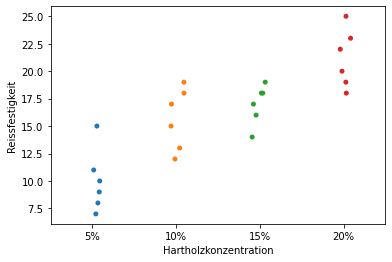

In [3]:
%matplotlib inline
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt
from scipy import stats

sns.stripplot(x="HC", y="Strength", data=rf)

plt.xlabel("Hartholzkonzentration")
plt.ylabel("Reissfestigkeit")

plt.show()

### Boxplots

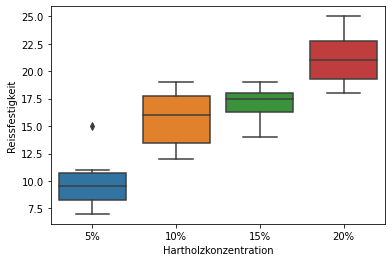

In [4]:
sns.boxplot(x="HC", y="Strength", data=rf)

plt.xlabel("Hartholzkonzentration")
plt.ylabel("Reissfestigkeit")

plt.show()

## Koeffizienten des Gruppenmittelmodells

In [5]:
rf = DataFrame({
"HC": np.repeat(["5%","10%","15%","20%"], [6, 6, 6, 6]),
"Strength":[7, 8, 15, 11, 9, 10, 12, 
            17, 13, 18, 19, 15, 14, 
            18, 19, 17, 16, 18, 19, 
            25, 22, 23, 18, 20]
})

fit = ols("Strength~HC",data=rf).fit()
fit.summary()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           3.59e-06
Time:                        14:42:35   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6667      1.041     15.042      0.0

In [6]:
fit = ols("Strength~HC",data=rf).fit()
print(fit.params)

Intercept    15.666667
HC[T.15%]     1.333333
HC[T.20%]     5.500000
HC[T.5%]     -5.666667
dtype: float64


## Vertrauensintervalle

In [7]:
fit = ols("Strength~HC",data=rf).fit()
fit_pred = fit.get_prediction()
print(fit_pred.conf_int())

[[ 7.8274691  12.1725309 ]
 [ 7.8274691  12.1725309 ]
 [ 7.8274691  12.1725309 ]
 [ 7.8274691  12.1725309 ]
 [ 7.8274691  12.1725309 ]
 [ 7.8274691  12.1725309 ]
 [13.49413576 17.83919757]
 [13.49413576 17.83919757]
 [13.49413576 17.83919757]
 [13.49413576 17.83919757]
 [13.49413576 17.83919757]
 [13.49413576 17.83919757]
 [14.8274691  19.1725309 ]
 [14.8274691  19.1725309 ]
 [14.8274691  19.1725309 ]
 [14.8274691  19.1725309 ]
 [14.8274691  19.1725309 ]
 [14.8274691  19.1725309 ]
 [18.99413576 23.33919757]
 [18.99413576 23.33919757]
 [18.99413576 23.33919757]
 [18.99413576 23.33919757]
 [18.99413576 23.33919757]
 [18.99413576 23.33919757]]


## Beispiel: Meat

### Stripcharts

In [8]:
%matplotlib inline
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt
from scipy import stats

meat = DataFrame({
"Treatment": np.repeat(["Kommerziell","Vakuum","Gemischt","CO2"], [3, 3, 3, 3]),
"steak_id":[7.66, 6.98, 7.80, 5.26, 5.44, 5.80, 7.41, 7.33, 7.04, 3.51, 2.91, 3.66]
})
print(meat)

      Treatment  steak_id
0   Kommerziell      7.66
1   Kommerziell      6.98
2   Kommerziell      7.80
3        Vakuum      5.26
4        Vakuum      5.44
5        Vakuum      5.80
6      Gemischt      7.41
7      Gemischt      7.33
8      Gemischt      7.04
9           CO2      3.51
10          CO2      2.91
11          CO2      3.66


Text(0, 0.5, 'Logarithmus Bakterienzahl')

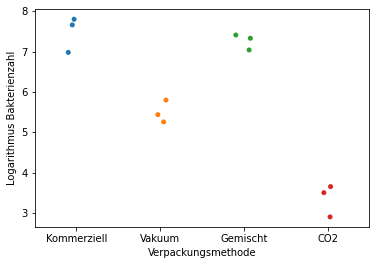

In [9]:
sns.stripplot(x="Treatment", y="steak_id", data=meat)
plt.xlabel("Verpackungsmethode")
plt.ylabel("Logarithmus Bakterienzahl")

## Boxplots

Text(0, 0.5, 'Logarithmus Bakterienzahl')

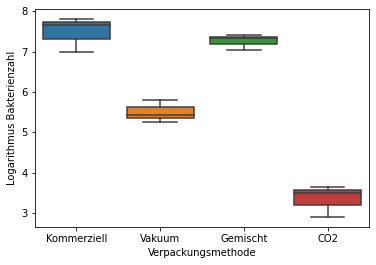

In [10]:
sns.boxplot(x="Treatment", y="steak_id", data=meat)
plt.xlabel("Verpackungsmethode")
plt.ylabel("Logarithmus Bakterienzahl")

## Paarweise t-Tests

In [11]:
kommerziell = meat.loc[meat["Treatment"]=="Kommerziell", "steak_id"]
print(kommerziell)
vakuum = meat.loc[meat["Treatment"]=="Vakuum", "steak_id"]
print(vakuum)
print(st.ttest_ind(kommerziell, vakuum))

0    7.66
1    6.98
2    7.80
Name: steak_id, dtype: float64
3    5.26
4    5.44
5    5.80
Name: steak_id, dtype: float64
Ttest_indResult(statistic=6.624581090670243, pvalue=0.002693168427673352)


## Gruppenmittelmodell : Summary

In [12]:
meat = DataFrame({
"Treatment": np.repeat(["Kommerziell","Vakuum","Gemischt","CO2"], [3, 3, 3, 3]),
"steak_id":[7.66, 6.98, 7.80, 5.26, 5.44, 5.80, 7.41, 7.33, 7.04, 3.51, 2.91, 3.66]
})
print(meat)
fit = ols("steak_id~Treatment",data=meat).fit()

fit.summary()
print(fit.summary())

      Treatment  steak_id
0   Kommerziell      7.66
1   Kommerziell      6.98
2   Kommerziell      7.80
3        Vakuum      5.26
4        Vakuum      5.44
5        Vakuum      5.80
6      Gemischt      7.41
7      Gemischt      7.33
8      Gemischt      7.04
9           CO2      3.51
10          CO2      2.91
11          CO2      3.66
                            OLS Regression Results                            
Dep. Variable:               steak_id   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     94.58
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.38e-06
Time:                        14:42:43   Log-Likelihood:                -1.6617
No. Observations:                  12   AIC:                             11.32
Df Residuals:                       8   BIC:                             13.26
Df Model:                     

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Gruppenmittelmodell : Parameterwerte

In [13]:

meat = DataFrame({
"Treatment": np.repeat(["Kommerziell","Vakuum","Gemischt","CO2"], [3, 3, 3, 3]),
"steak_id":[7.66, 6.98, 7.80, 5.26, 5.44, 5.80, 7.41, 7.33, 7.04, 3.51, 2.91, 3.66]
})

fit = ols("steak_id~Treatment",data=meat).fit()

fit.params
print(fit.params)

Intercept                   3.36
Treatment[T.Gemischt]       3.90
Treatment[T.Kommerziell]    4.12
Treatment[T.Vakuum]         2.14
dtype: float64


Die Parametrisierung wurde so gewählt, dass $\mu=\mu_1=3.36$, d.h. 
$\tau_1=0$.
Die behandlungsspezifischen Abweichungen sind $\tau_2=3.90$, 
$\tau_3=4.12$ und $\tau_4=2.14$. D.h. $\mu_2=\mu +\tau_2 = 3.36+3.90$.


## Vertrauensintervalle für Gruppenmittelwerte

In [14]:
fit_pred = fit.get_prediction()
print(meat)
print(fit_pred.conf_int())

      Treatment  steak_id
0   Kommerziell      7.66
1   Kommerziell      6.98
2   Kommerziell      7.80
3        Vakuum      5.26
4        Vakuum      5.44
5        Vakuum      5.80
6      Gemischt      7.41
7      Gemischt      7.33
8      Gemischt      7.04
9           CO2      3.51
10          CO2      2.91
11          CO2      3.66
[[7.02684427 7.93315573]
 [7.02684427 7.93315573]
 [7.02684427 7.93315573]
 [5.04684427 5.95315573]
 [5.04684427 5.95315573]
 [5.04684427 5.95315573]
 [6.80684427 7.71315573]
 [6.80684427 7.71315573]
 [6.80684427 7.71315573]
 [2.90684427 3.81315573]
 [2.90684427 3.81315573]
 [2.90684427 3.81315573]]


Python gibt hier direkt die Vertrauensintervalle der Gruppenmittelwerte $\mu_i$ an und nicht die Vertrauensintervalle der behandlungsspezifischen Abweichungen.

## Simulation F-Statistik


Die Verteilung der Teststatistik für das Beispiel Verpackung von Fleisch kann auch simuliert werden. Dazu wurde ein lineares Regressionsmodell angepasst. Unter der Nullhyothese müssten alle Beobachtungen normalverteilt sein mit Mittelwert gleich 3.3600 (Mittelwert der Anzahl Bakterien) und Standardabweichung 0.55 (Residual standard deviation im Describe-Output). 

In der Simulation werden pro Simulationsschritt 12 Zufallszahlen gemäss dieser Normalverteilung mit Erwartungswert $3.36$ und Standardabweichung $0.34$ gezogen. Anschliessend wird damit die Teststatistik berechnet, wobei die simulierten Zufallszahlen zufällig auf die 4 Behandlungsgruppen (Verpackungsarten) aufgeteilt werden.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


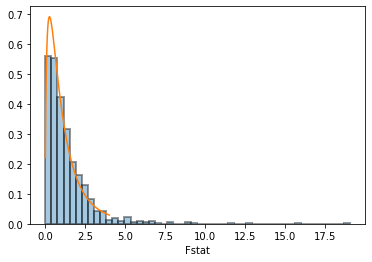

In [15]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt


n = 12
g = 4
m = 3

Fstat = np.empty(1000)

for i in np.arange(1000):
    meat_sim = st.norm.rvs(size=n, loc=3.3600, scale=0.34)
    meat_mat = np.reshape(meat_sim,(-1,4))
    grand_mean = np.mean(meat_sim)
    group_mean = np.mean(meat_mat,axis=0)
    MSG = m*np.sum((group_mean-grand_mean)**2)/(g-1)
    MSE = np.sum(np.sum((meat_mat-group_mean)**2,axis=0))/(n-g)
    Fstat[i] = MSG/MSE
   
 
sns.distplot(Fstat,kde=False, norm_hist=True, hist_kws=dict(edgecolor="black", linewidth=2))
x = np.linspace(0.01,4,num=500)
y = st.f.pdf(x=x, dfn=3, dfd=8)

plt.plot(x,y) 

plt.xlabel("Fstat")

plt.show()

# Anova Tabelle

In [16]:
fit = ols("steak_id~Treatment",data=meat).fit()
anova_lm(fit)
print(anova_lm(fit))

            df   sum_sq   mean_sq          F    PR(>F)
Treatment  3.0  32.8728  10.95760  94.584376  0.000001
Residual   8.0   0.9268   0.11585        NaN       NaN


Der $P$-Wert von  $1\cdot 10^{-6}$ besagt, dass ein Effekt von unterschiedlichen 
Verpackungsmethoden signifikant auf dem 5% Niveau nachgewiesen 
werden kann. Die Gruppenmittelwerte unterscheiden sich also signifikant. 